In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [44]:
vehicles_df = pd.read_csv('vehicles_us.csv')
display(vehicles_df)
display(vehicles_df.info())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


None

In [45]:
display(vehicles_df.duplicated())
print(vehicles_df.duplicated().sum())



0        False
1        False
2        False
3        False
4        False
         ...  
51520    False
51521    False
51522    False
51523    False
51524    False
Length: 51525, dtype: bool

0


No Duplicate rows found in vehilcles_df

In [46]:
year_mean = vehicles_df['model_year'].mean()
print(year_mean)

vehicles_df['model_year'] = vehicles_df['model_year'].fillna(2009)
vehicles_df['is_4wd'] = vehicles_df['is_4wd'].fillna(0.0)
vehicles_df['paint_color'] = vehicles_df['paint_color'].fillna('Not Available')
vehicles_df_w_odometer = vehicles_df.dropna(subset=['odometer'])

#Vehicles without an accurate odometer reading have been removed from the vehicle advertisment list

Q1_year = vehicles_df_w_odometer['model_year'].quantile(0.25)
Q3_year = vehicles_df_w_odometer['model_year'].quantile(0.75)
IRQ_year = Q3_year - Q1_year

Q1_price = vehicles_df_w_odometer['price'].quantile(0.25)
Q3_price = vehicles_df_w_odometer['price'].quantile(0.75)
IRQ_price = Q3_price - Q1_price

Q1_miles = vehicles_df_w_odometer['odometer'].quantile(0.25)
Q3_miles = vehicles_df_w_odometer['odometer'].quantile(0.75)
IRQ_miles = Q3_miles - Q1_miles

vehicles_df_w_odometer = vehicles_df_w_odometer[~((vehicles_df_w_odometer['model_year'] < (Q1_year - 1.5 * IRQ_year)) | (vehicles_df_w_odometer['model_year'] > (Q3_year + 1.5 * IRQ_year)))]
vehicles_df_w_odometer = vehicles_df_w_odometer[~((vehicles_df_w_odometer['price'] < (Q1_price - 1.5 * IRQ_price)) | (vehicles_df_w_odometer['price'] > (Q3_price + 1.5 * IRQ_price)))]
vehicles_df_w_odometer = vehicles_df_w_odometer[~((vehicles_df_w_odometer['odometer'] < (Q1_miles - 1.5 * IRQ_miles)) | (vehicles_df_w_odometer['odometer'] > (Q3_miles + 1.5 *IRQ_miles)))]

vehicles_df_w_odometer = vehicles_df_w_odometer.rename(columns={'price': 'Price($)', 'model_year': 'Year', 'model': 'Make/Model', 'condition': 'Condition', 'cylinders': 'Cylinders', 'fuel': 'Fuel', 'odometer': 'Odometer', 'type': 'Type', 'paint_color': 'Paint', 'is_4wd': '4WD', 'date_posted': 'Date Posted', 'days_listed': 'Days Listed'})

vehicles_df_w_odometer['4WD'] = vehicles_df_w_odometer['4WD'].replace({'1.0': 'Yes', '0.0': 'No'}).astype(object)

display(vehicles_df_w_odometer)



2009.75046966977


,Price($),Year,Make/Model,Condition,Cylinders,Fuel,Odometer,transmission,Type,Paint,4WD,Date Posted,Days Listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,Not Available,1.0,2018-06-23,19
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,0.0,2018-08-10,63
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32


Vehicles without odometer readings have been removed, as it's one of the central items that determines price. One cannot simply guess an odometer reading and come up with a fair price. 
Otherwise, missing values have been addressed according to their respective datatypes to keep consistency.

In [47]:
year_average = vehicles_df_w_odometer['Year'].mean()
odometer_average = vehicles_df_w_odometer['Odometer'].mean()
days_listed_average = vehicles_df_w_odometer['Days Listed'].mean()
year_median = vehicles_df_w_odometer['Year'].median()
odometer_median = vehicles_df_w_odometer['Odometer'].median()
days_listed_median = vehicles_df_w_odometer['Days Listed'].median()

print(year_average)
print(odometer_average)
print(days_listed_average)

print(year_median)
print(odometer_median)
print(days_listed_median)

2010.0702068221917
114974.0474906881
39.6007400509704
2010.0
114000.0
33.0


Averages have been taken where it made sense to. Interestingly enough, the medians were also very close to the averages, which gives a pretty reliable picture of this car lot. This dearlership clearly deals with, on average, older used vehicles which have over 100,000 miles and sit on the lot for about 40 days.

Condition
excellent    11768.212339
fair          3421.488789
good         10587.415677
like new     14034.183719
new          14169.925000
salvage       4541.309524
Name: Price($), dtype: float64

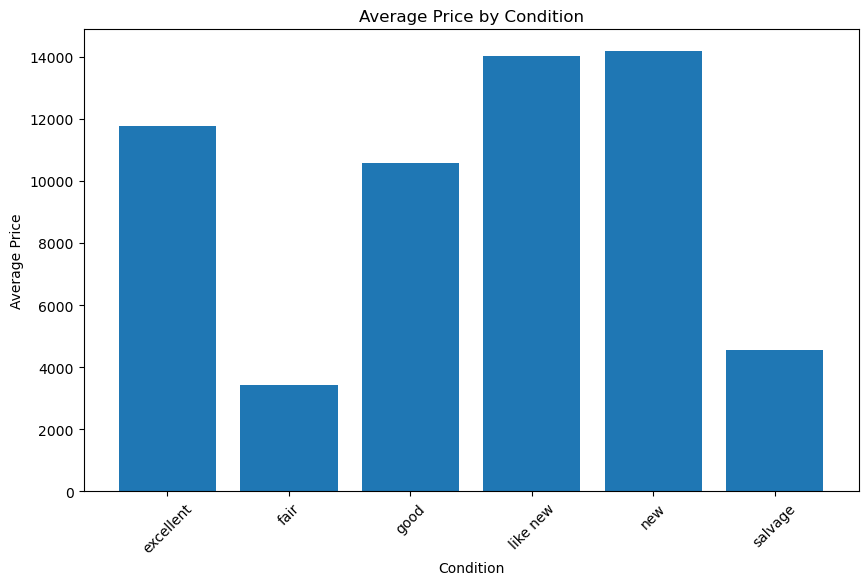

Fuel
diesel      18293.997839
electric     7560.200000
gas         10859.660439
hybrid       7450.376437
other       16728.349398
Name: Price($), dtype: float64

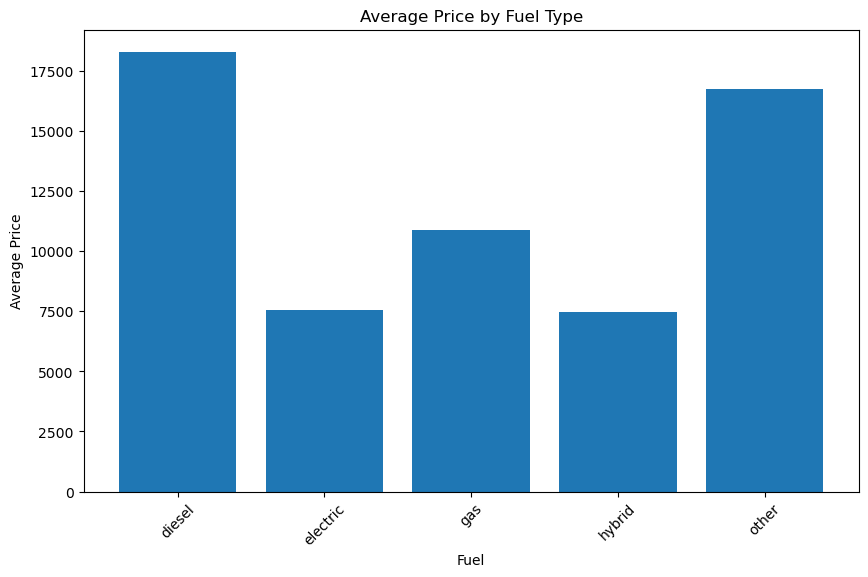

Paint
Not Available    11383.017251
black            12437.958478
blue              9796.729874
brown            10010.789802
custom            9745.001080
green             8589.150284
grey             10455.567454
orange           13980.021622
purple            6835.319444
red              10858.685855
silver           10099.679198
white            12845.121402
yellow           15223.818182
Name: Price($), dtype: float64

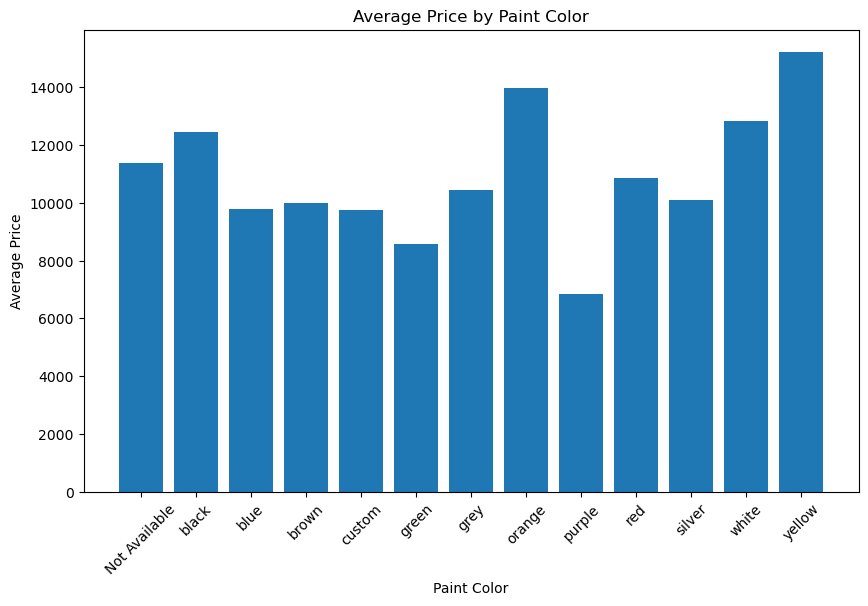

Days Listed
0      11186.488372
1      12620.229630
2      12143.653659
3      11403.721683
4      10951.847561
           ...     
256     8980.000000
261     3800.000000
263     5995.000000
267     5500.000000
271     5200.000000
Name: Price($), Length: 216, dtype: float64

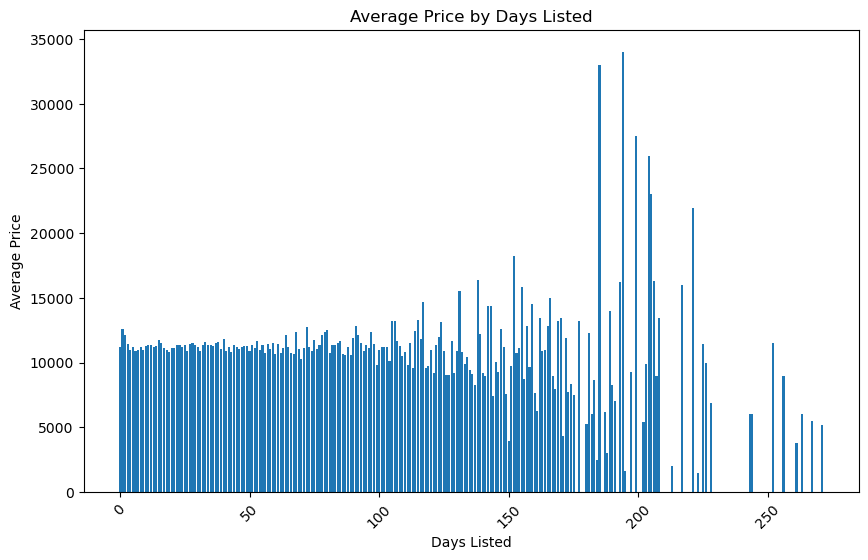

In [48]:
#Average Price By Condition
average_price_by_condition = vehicles_df_w_odometer.groupby('Condition')['Price($)'].mean()
display(average_price_by_condition)

plt.figure(figsize=(10, 6))
plt.bar(average_price_by_condition.index, average_price_by_condition.values)
plt.title('Average Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

#Average Price By Fuel
avg_price_by_fuel = vehicles_df_w_odometer.groupby('Fuel')['Price($)'].mean()
display(avg_price_by_fuel)

plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_fuel.index, avg_price_by_fuel.values)
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

#Average Price By Paint Color
avg_price_by_color = vehicles_df_w_odometer.groupby('Paint')['Price($)'].mean()
display(avg_price_by_color)

plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_color.index, avg_price_by_color.values)
plt.title('Average Price by Paint Color')
plt.xlabel('Paint Color')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

#Average Price By Days Listed
avg_price_by_days_listed = vehicles_df_w_odometer.groupby('Days Listed')['Price($)'].mean()
display(avg_price_by_days_listed)

plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_days_listed.index, avg_price_by_days_listed.values)
plt.title('Average Price by Days Listed')
plt.xlabel('Days Listed')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

This last graph tells some interesting information. Despite some of these vehicles remaining on the lot for over half a year, they are refusing to lower the price to try and get them sold. However, where this may not be a big deal is if they are having quick turnaround with the lower-priced, used cars. 

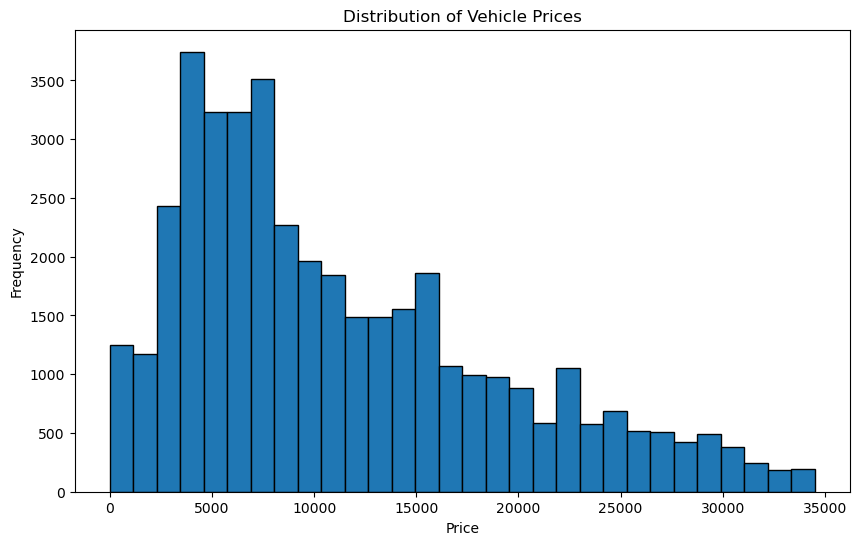

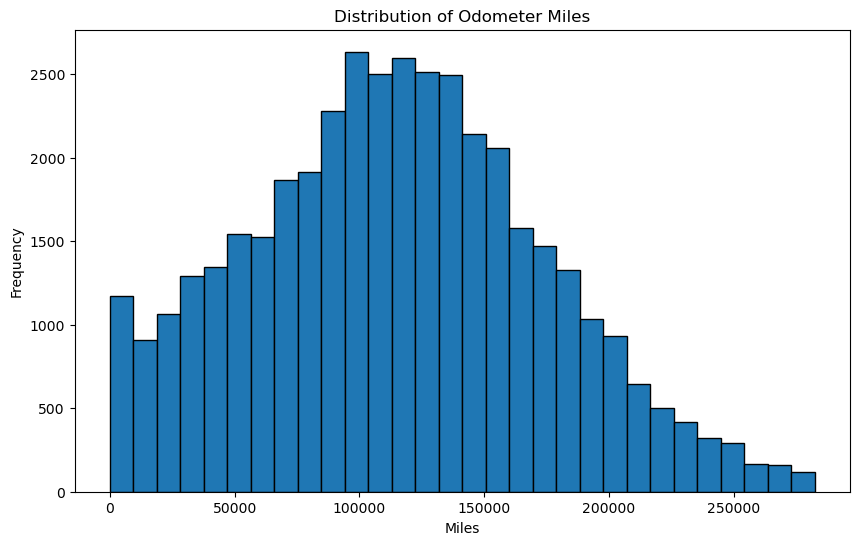

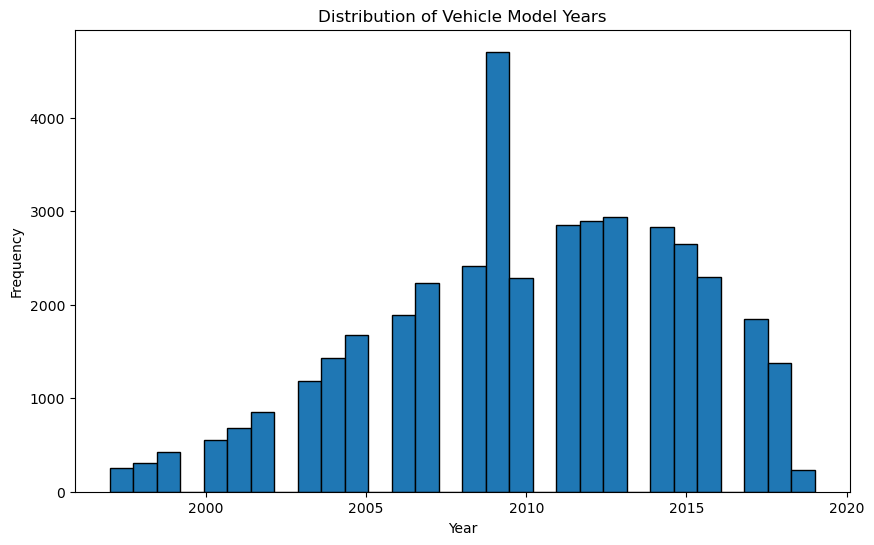

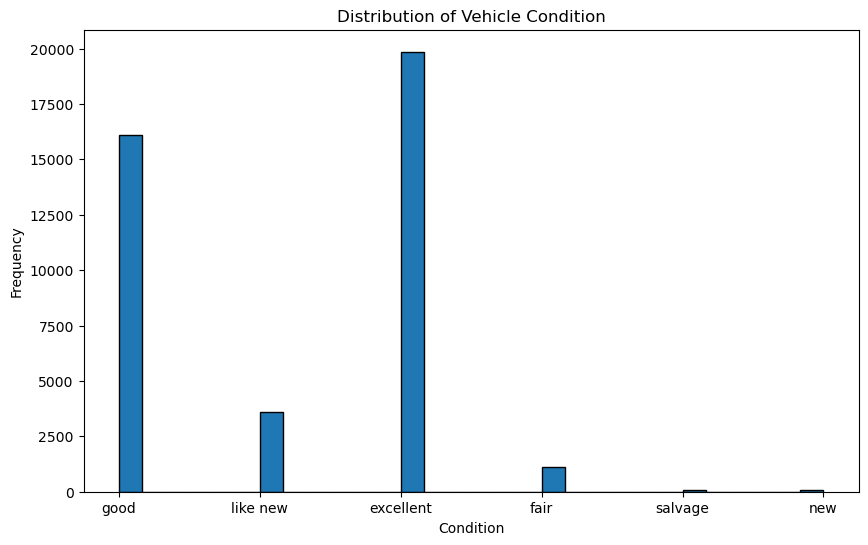

In [49]:
#Histograms
plt.figure(figsize=(10, 6))
plt.hist(vehicles_df_w_odometer['Price($)'], bins=30, edgecolor='black')
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(vehicles_df_w_odometer['Odometer'], bins=30, edgecolor='black')
plt.title('Distribution of Odometer Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(vehicles_df_w_odometer['Year'], bins=30, edgecolor='black')
plt.title('Distribution of Vehicle Model Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(vehicles_df_w_odometer['Condition'], bins=30, edgecolor='black')
plt.title('Distribution of Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()

The histograms show this dealership has majority of cars in excellent or good condtion. This may be why the average days listed is about 40. Basically, they seem to have cars in solid condition which stay, on average, a little over a month--this indicates customers believe the prices for quality are fair for the most part.

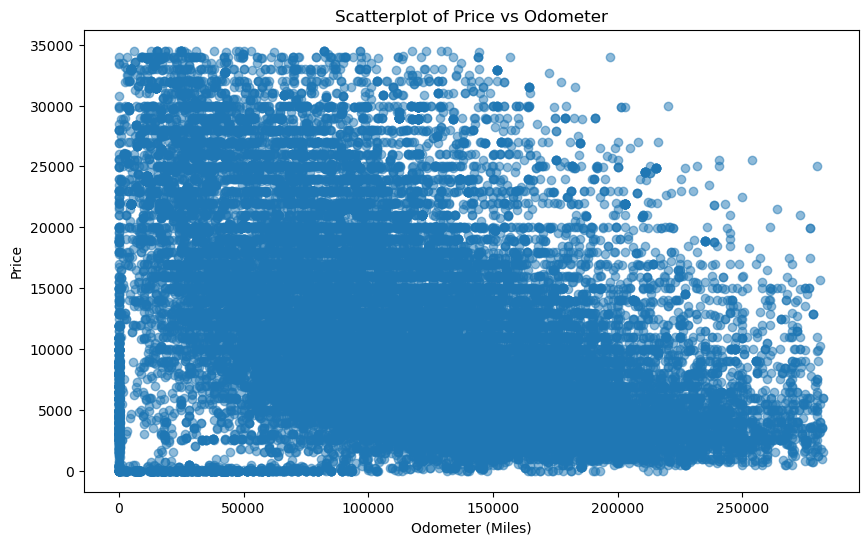

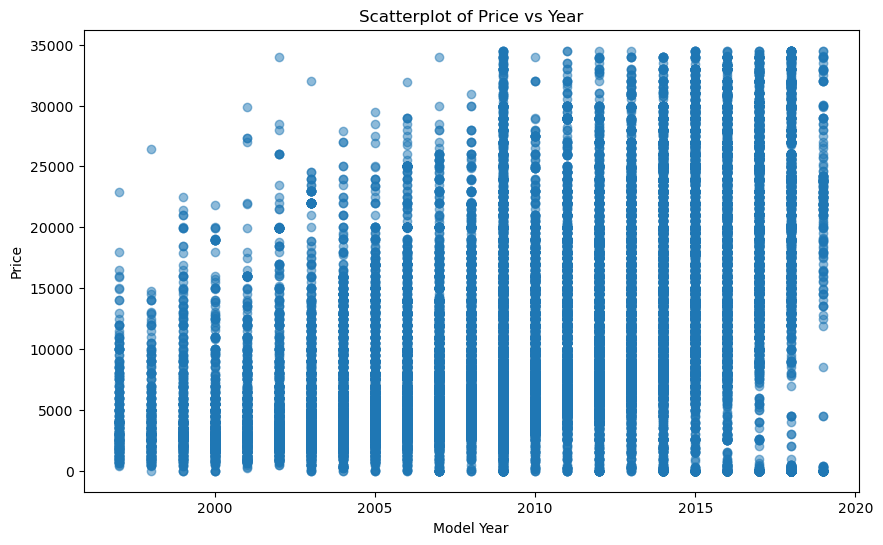

In [50]:
#Scatter Plots
#Odometer Vs Price
plt.figure(figsize=(10, 6))
plt.scatter(vehicles_df_w_odometer['Odometer'], vehicles_df_w_odometer['Price($)'], alpha=0.5)
plt.title('Scatterplot of Price vs Odometer')
plt.xlabel('Odometer (Miles)')
plt.ylabel('Price')
plt.show()

#ModelYear Vs Price
plt.figure(figsize=(10, 6))
plt.scatter(vehicles_df_w_odometer['Year'], vehicles_df_w_odometer['Price($)'], alpha=0.5)
plt.title('Scatterplot of Price vs Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()


The scatter plots further reiforce the conclusions already came to. This dealer has cars which are, mostly, less than 20 years old and at fairer prices.